This notebook assumes access to detrended, denoised signals and calculates various parameters (and uncertainties) from these signals and serves as an area for experimentation with methods for parameter estimation. The parameters estimated within this notebook are: 
 - peak to peak time
 - amplitude.....

In [17]:
%run "Data_PreProcessing.ipynb" #allowing access to the filtered database with preprocessed signals

100%|███████████████████████████████████████████████████████████████████████████████| 229/229 [00:01<00:00, 186.11it/s]


In [18]:
from scipy.signal import find_peaks

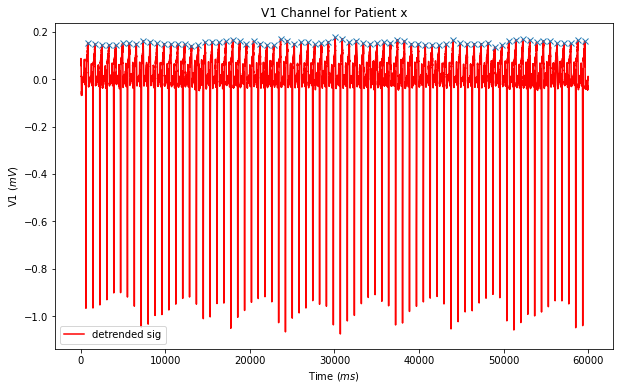

In [19]:
peaks, _ = find_peaks(butterworth_detrended_signals[34], distance=500, height = 0.1) #can add height but still dont know how to do exactly


fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.plot(butterworth_detrended_signals[34], color = 'red', label = 'detrended sig')
ax.plot(peaks, butterworth_detrended_signals[34][peaks], 'x')

ax.set_xlabel(r'Time ($ms$)')
ax.set_ylabel(r'V1 ($mV$)')
ax.set_title('V1 Channel for Patient x')

ax.legend()
plt.show()

identified peaks, should get rid of first and last values in it, wont hurt much even if is correct ones. I shall now implement a function to perform this for all signals in the database, may have to find a way to automatically calculate the distance between signals, find way to get rid of outliers....

In [4]:
#why do some signals have really large tails and some have larger peaks?

In [5]:
def peak_to_peak(signal, distance):
    peaks, _ = find_peaks(signal, distance = distance)
    peak_to_peaks = peaks[1:-1]

    # Calculate differences between adjacent peak indices
    peak_distances = np.diff(peak_to_peaks)

    # Compute the average distance between peaks
    peak_av = np.mean(peak_distances)
    #peak_std = np.std(peak_distances) dont think we want this??
    
    return peak_av


peak_to_peak_averages = np.zeros(shape = no_patients)
for i, signal in enumerate(butterworth_detrended_signals):
    peak_av = peak_to_peak(signal, 600)
    peak_to_peak_averages[i] = peak_av



In [16]:
health_state = allowed_patients.get_diagnoses()

encoded_health_state = [True if label == 'Unhealthy' else False for label in health_state]

unhealthy_peak_to_peak_averages = peak_to_peak_averages[encoded_health_state]
healthy_peak_to_peak_averages = peak_to_peak_averages[~np.array(encoded_health_state)]


unhealthy_peak_to_peak_av = np.average(unhealthy_peak_to_peak_averages)
unhealthy_peak_to_peak_std = np.std(unhealthy_peak_to_peak_averages)
healthy_peak_to_peak_av = np.average(healthy_peak_to_peak_averages)
healthy_peak_to_peak_std = np.std(healthy_peak_to_peak_averages)

print("Unhealthy:", unhealthy_peak_to_peak_av, unhealthy_peak_to_peak_std)
print("Healthy:", healthy_peak_to_peak_av, healthy_peak_to_peak_std)

46
Unhealthy: 816.2688950433381 114.9463194502719
Healthy: 878.0488651974767 111.76348662559417


In [ ]:
#write fucniton to calculate peak to peaks
#check works - probably have to find a way to automatically calculate 'wavelength'
#find way to calculate the average peak to peak and std
#implement this in function to do it automatically

#can see is difference between the means but standard deviation is similar